## Observations and Insights 

1.Ramicane, Capomulin, Infubinol & Ceftamin were among the potential treatments for squamous cell carcinoma (SCC), a commonly occuring skin cancer. Based on the data, these treatments have the lowest standard deviations compared to the rest of the other 6 treatments. However, Ramicane (standard deviation of 4.43) and Capomulin (standard deviation of 4.99) were the most preferred treatments because they have a significantly lower standard deviation compared to Infubinol and Ceftamin.

2.The dataframe drafted for Mice Participation by Timepoints for each Drug Regimen showed that the total number of mice decreases as it reaches the 45th day

3.Based on the coreslation coefficient of the regression line in Capomulin, there is a strong relation between the weight of the mice and growth of the tumor volume. Per the Scatter Plot completed, the heavier the mouse, the bigger the tumor volume. 

In [161]:
%matplotlib notebook

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")


# Display the data table for preview
merge_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [162]:
# Checking the number of mice.
mice_count = merge_data["Mouse ID"].nunique()
print("Number of Mice :", (mice_count))

Number of Mice : 249


In [163]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_count = merge_data[merge_data.duplicated(["Mouse ID"])]
duplicate_mice_count.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1


In [164]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_miceID = duplicate_mice_count["Mouse ID"].unique()
dup_miceID[0]

'k403'

In [165]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#merge_data_drop = merge_data.drop_duplicates(subset="Mouse ID", keep="last")
#print(merge_data.drop_duplicates)
#merge_data_drop.head()
duplicate_mouseID = merge_data["Mouse ID"]!= dup_miceID[0]
merge_data_drop = merge_data.loc[duplicate_mouseID, :]
merge_data_drop.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [166]:
# Checking the number of mice in the clean DataFrame.
len(merge_data_drop["Mouse ID"].unique())

248

## Summary Statistics

In [167]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean_tumor = merge_data_drop.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_tumor = merge_data_drop.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
var_tumor = merge_data_drop.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std_tumor = merge_data_drop.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem_tumor = merge_data_drop.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_stats = pd.DataFrame({"Mean" : mean_tumor,
                             "Median" : median_tumor,
                             "Variance" : var_tumor,
                             "STD" : std_tumor,
                              "SEM" : sem_tumor})

summary_stats


,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.577199,41.020724,19.660760,4.434046,0.300311
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [168]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
#drugs_total = pd.DataFrame(pd.value_counts(merge_data["Drug Regimen"]))
#drugs_total
drugs_total = merge_data_drop.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
drugs_total.head()

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar and Pie Charts

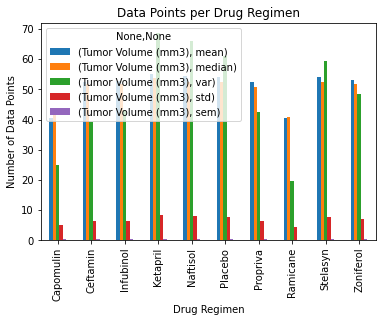

<Figure size 432x288 with 0 Axes>

In [169]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pandas.
%matplotlib inline

drugs_total.plot(kind="bar")
plt.title("Data Points per Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")
plt.show()
plt.tight_layout()

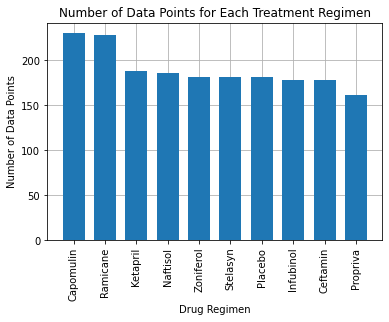

In [170]:
counts = merge_data['Drug Regimen'].value_counts()

x_axis = np.arange(len(counts))

plt.bar(x_axis, counts, width = 0.7, zorder=3)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values)
plt.xticks(rotation=90)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title('Number of Data Points for Each Treatment Regimen')

plt.grid(zorder=0)

plt.show()

In [171]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_total = pd.value_counts(merge_data_drop['Sex'])
gender_total

Male      948
Female    935
Name: Sex, dtype: int64

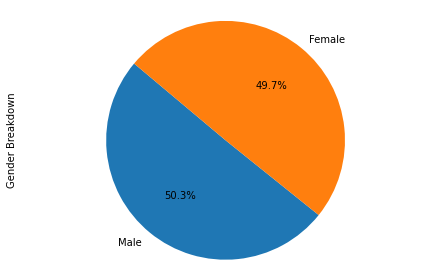

In [172]:
#Pandas
gender_pandas = gender_total.plot(kind="pie", y="gender breakdown", autopct='%1.1f%%', startangle=140)
gender_pandas.set_ylabel("Gender Breakdown")

plt.tight_layout()
plt.axis("equal")
plt.show()

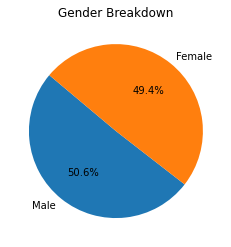

In [174]:
#pyplot
data = merge_data['Sex'].value_counts()

plt.pie(data, labels=data.index.values, autopct="%1.1f%%", startangle=140)
plt.title('Gender Breakdown')

plt.show()


## Quartiles, Outliers and Boxplots

In [175]:
max_tp_df = pd.DataFrame(merge_data.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
max_tp_df

merged_df = pd.merge(merge_data, max_tp_df, on='Mouse ID')
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [176]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    # Determine outliers using upper and lower bounds

Capomulin = merge_data_drop.loc[merge_data_drop["Drug Regimen"] == "Capomulin"]
Ramicane = merge_data_drop.loc[merge_data_drop["Drug Regimen"] == "Ramicane"]
Infubinol = merge_data_drop.loc[merge_data_drop["Drug Regimen"] == "Infubinol"]
Ceftamin = merge_data_drop.loc[merge_data_drop["Drug Regimen"] == "Ceftamin"]

x_axisCa = Capomulin["Tumor Volume (mm3)"]
x_axisR = Ramicane["Tumor Volume (mm3)"]
x_axisI = Infubinol["Tumor Volume (mm3)"]
x_axisCe = Ceftamin["Tumor Volume (mm3)"]

quartiles_Ca = x_axisCa.quantile([.25,.5,.75])
lowerq_Ca = quartiles_Ca[0.25]
upperq_Ca = quartiles_Ca[0.75]
iqr_Ca = upperq_Ca-lowerq_Ca
lower_bound_Ca = lowerq_Ca - (1.5*iqr_Ca)
upper_bound_Ca = upperq_Ca + (1.5*iqr_Ca)
print("Drug: Capomulin")
print(quartiles_Ca)
print(lowerq_Ca)
print(upperq_Ca)
print(iqr_Ca)
print(f"Values below {lower_bound_Ca} could be outliers.")
print(f"Values above {upper_bound_Ca} could be outliers.")
print(f"--------------------------------------------------------")

quartiles_R = x_axisR.quantile([.25,.5,.75])
lowerq_R = quartiles_R[0.25]
upperq_R = quartiles_R[0.75]
iqr_R = upperq_R-lowerq_R
lower_bound_R = lowerq_R - (1.5*iqr_R)
upper_bound_R = upperq_R + (1.5*iqr_R)
print("Drug: Ramicane")
print(quartiles_R)
print(lowerq_R)
print(upperq_R)
print(iqr_R)
print(f"Values below {lower_bound_R} could be outliers.")
print(f"Values above {upper_bound_R} could be outliers.")
print(f"--------------------------------------------------------")

quartiles_I = x_axisI.quantile([.25,.5,.75])
lowerq_I = quartiles_I[0.25]
upperq_I = quartiles_I[0.75]
iqr_I = upperq_I-lowerq_I
lower_bound_I = lowerq_I - (1.5*iqr_I)
upper_bound_I = upperq_I + (1.5*iqr_I)
print("Drug: Infubinol")
print(quartiles_I)
print(lowerq_I)
print(upperq_I)
print(iqr_I)
print(f"Values below {lower_bound_I} could be outliers.")
print(f"Values above {upper_bound_I} could be outliers.")
print(f"--------------------------------------------------------")

quartiles_Ce = x_axisCe.quantile([.25,.5,.75])
lowerq_Ce = quartiles_Ce[0.25]
upperq_Ce = quartiles_Ce[0.75]
iqr_Ce = upperq_Ce-lowerq_Ce
lower_bound_Ce = lowerq_Ce - (1.5*iqr_Ce)
upper_bound_Ce = upperq_Ce + (1.5*iqr_Ce)
print("Drug: Ceftamin")
print(quartiles_Ce)
print(lowerq_Ce)
print(upperq_Ce)
print(iqr_Ce)
print(f"Values below {lower_bound_Ce} could be outliers.")
print(f"Values above {upper_bound_Ce} could be outliers.")
print(f"--------------------------------------------------------")

Drug: Capomulin
0.25    37.685933
0.50    41.557809
0.75    45.000000
Name: Tumor Volume (mm3), dtype: float64
37.685932865
45.0
7.314067135000002
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.
--------------------------------------------------------
Drug: Ramicane
0.25    37.247047
0.50    41.020724
0.75    45.000000
Name: Tumor Volume (mm3), dtype: float64
37.2470466275
45.0
7.752953372500002
Values below 25.617616568749995 could be outliers.
Values above 56.62943005875 could be outliers.
--------------------------------------------------------
Drug: Infubinol
0.25    47.312353
0.50    51.820584
0.75    57.314444
Name: Tumor Volume (mm3), dtype: float64
47.3123533
57.314443967500004
10.002090667500006
Values below 32.309217298749985 could be outliers.
Values above 72.31757996875001 could be outliers.
--------------------------------------------------------
Drug: Ceftamin
0.25    47.208427
0.50    51.776157
0.75    56.801438
Name: Tumo

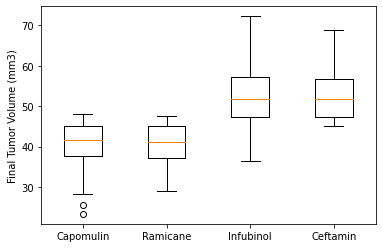

In [177]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
%matplotlib inline

fig1, ax1 = plt.subplots()
ax1.boxplot([x_axisCa, x_axisR, x_axisI, x_axisCe])
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

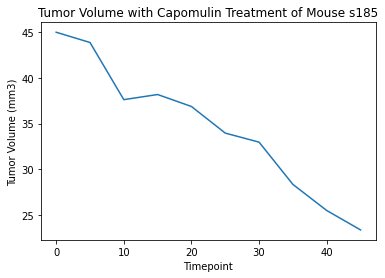

In [178]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
%matplotlib inline

x_axis = merge_data.loc[merge_data["Mouse ID"] == "s185"]
x_axis = x_axis["Timepoint"]
y_axis = merge_data.loc[merge_data["Mouse ID"] == "s185"]
y_axis = y_axis["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)
plt.title("Tumor Volume with Capomulin Treatment of Mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

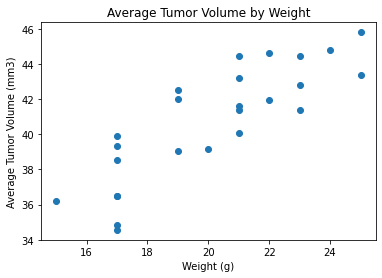

In [179]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_df = merge_data_drop.loc[merge_data_drop['Drug Regimen'] == 'Capomulin']


avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']


plt.scatter(x, y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()


## Correlation and Regression

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


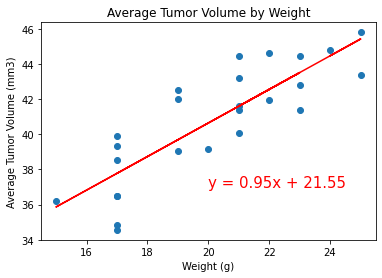

In [180]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

%matplotlib inline

capomulin_df = merge_data_drop.loc[merge_data_drop['Drug Regimen'] == 'Capomulin']
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df
x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']


correlation = st.pearsonr(x,y)


print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x,y)
plt.plot(x,regress_values,"r-")


plt.annotate(line_eq,(20,37),fontsize=15,color="red")


plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()